# Exploratory Data Analysis
This EDA focuses on the analysis of artificial Twitter comments connected to the narcissistic scale.

## Load the data

In [1]:
import numpy as np
import pandas as pd

# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# downaload the stopwords
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

True

In [3]:
# Load the data
data_path = '../data/processed/processed_data.csv'
new_data_path = '../data/processed/processed_new_data.csv'
data = pd.read_csv(data_path)
new_data = pd.read_csv(new_data_path)
data = pd.concat([data, new_data], ignore_index=True)
data.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,twitter,none,facebook,instagram,tiktok,linkedin,pinterest,other,other_portals_7_text,post_ai
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.333,2.778,1.0,NaN,38,1.0,NaN,2.0,...,6.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.778,1.222,2.0,NaN,28,8.0,British,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2,So excited to pick up my new BMW. It will be g...,Very unsure on the new government legislation....,3.222,1.444,2.0,NaN,31,1.0,NaN,2.0,...,6.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
3,Time travelling in thf future and back in time,Don't agree . There should be freedom of choice,3.889,2.667,1.0,NaN,57,1.0,NaN,2.0,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,barcelona is my favourite place to visit,everyone has a right to bodily autonomy - bann...,1.444,1.778,1.0,NaN,28,1.0,NaN,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"Total number of rows: {len(data)}")

Total number of rows: 526


## Analyze the data

In [5]:
# Check the missing values
data.isnull().sum()

post_travel                   0
post_abortion                 0
adm                           0
riv                           0
gender                        0
gender_3_text               521
age                           0
ethnic_background             0
ethnic_background_8_text    515
education                     0
education_6_text            507
employment                    0
employment_7_text           501
marital_status                0
twitter                       0
none                        512
facebook                    142
instagram                   133
tiktok                      272
linkedin                    311
pinterest                   341
other                       461
other_portals_7_text        461
post_ai                     185
dtype: int64

There is now in total 526 data points concerning travel and abortion. The is 341 data points on AI. From those it can be seen that most people use Facebook and Instagram. The other platforms are not used that much.

In [6]:
# Check the number of unique values in each column
data.nunique()

post_travel                 525
post_abortion               526
adm                          44
riv                          38
gender                        3
gender_3_text                 5
age                          58
ethnic_background             8
ethnic_background_8_text      9
education                     6
education_6_text             17
employment                    8
employment_7_text             7
marital_status                5
twitter                       3
none                          1
facebook                      1
instagram                     1
tiktok                        1
linkedin                      1
pinterest                     1
other                         1
other_portals_7_text         27
post_ai                     341
dtype: int64

The bonus text fields (ending with text) are mostly empty (the total number of rows is 526). 
Apart from popular social media sites, 27 other sites have been reported. That is twice as many social media platforms as in previous data. In travel post column there is one duplicate. This lead to discovery that some posts are AI generated.

### Narcistic scale

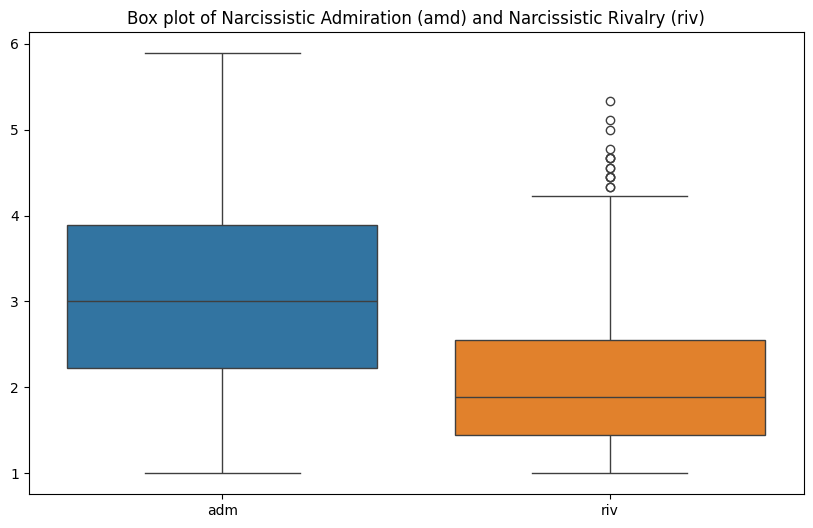

In [7]:
# plot the box chart of ADM and RIV column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['adm', 'riv']])
plt.title('Box plot of Narcissistic Admiration (amd) and Narcissistic Rivalry (riv)')
plt.show()


The two most important values are AMD - Narcissistic Admiration and RIV - Narcissistic Rivalry. Both are on a scale from 1 to 6, where 6 is correlated with the strongest narcotics traits. However, our data show the ADM from 1 to almost 6, and on an RIV scale is from 1 to 4 with 8 outliers. Both of these results are an improvement - however, there still could not be enough examples of high rivalry posts.

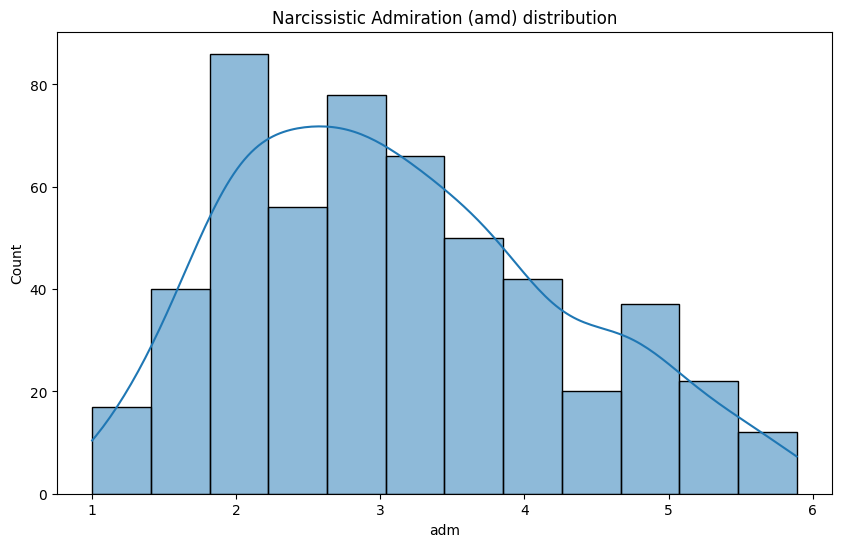

In [8]:
# Bar graph of adm distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['adm'], kde=True)
plt.title('Narcissistic Admiration (amd) distribution')
plt.show()


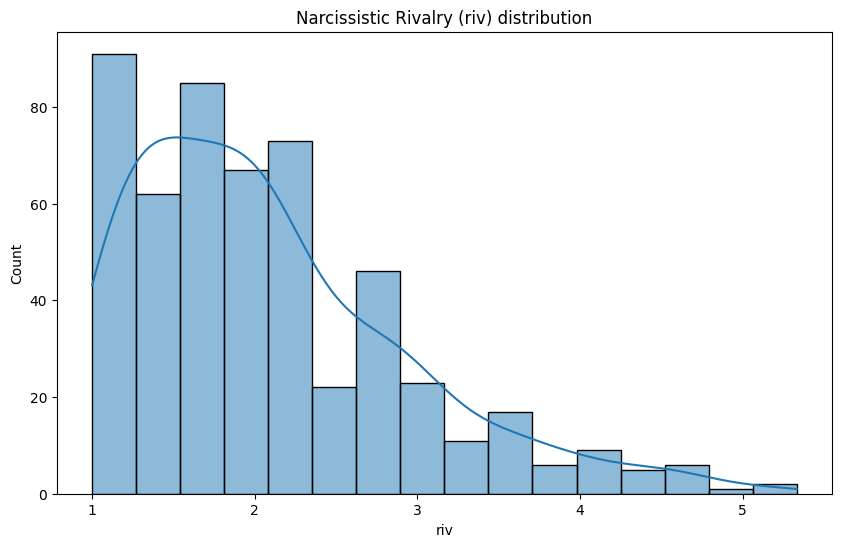

In [9]:
# Bar graph of riv distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['riv'], kde=True)
plt.title('Narcissistic Rivalry (riv) distribution')
plt.show()

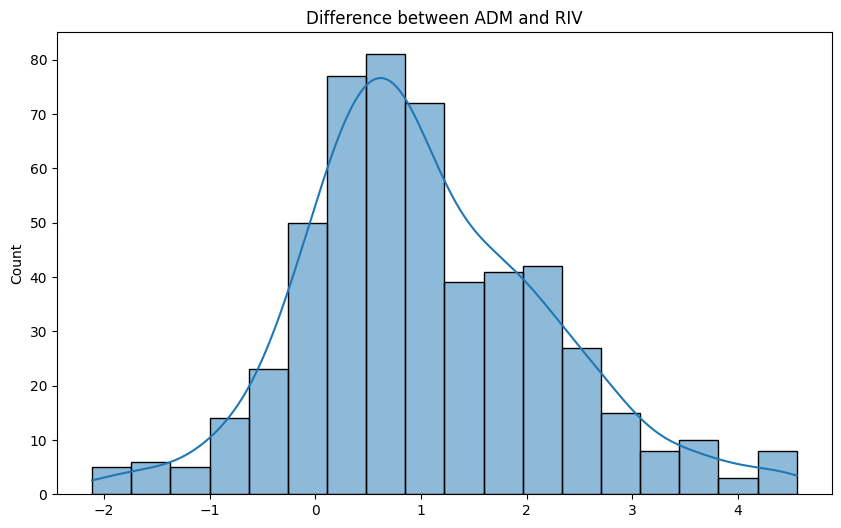

In [10]:
# Plot the difference between the two columns
plt.figure(figsize=(10, 6))
sns.histplot(data['adm'] - data['riv'], kde=True)
plt.title('Difference between ADM and RIV')
plt.show()

People from our data have a tendency to score higher on AMD scale than on RIV 

### Age and Gender distribution

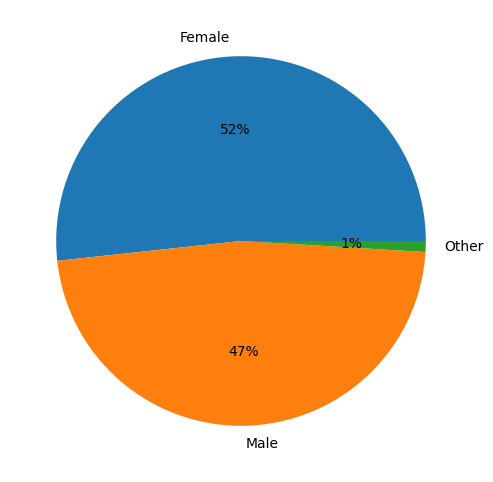

In [11]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
plt.pie(data['gender'].value_counts(),labels=['Female','Male','Other']
        ,autopct='%.0f%%')
plt.show()

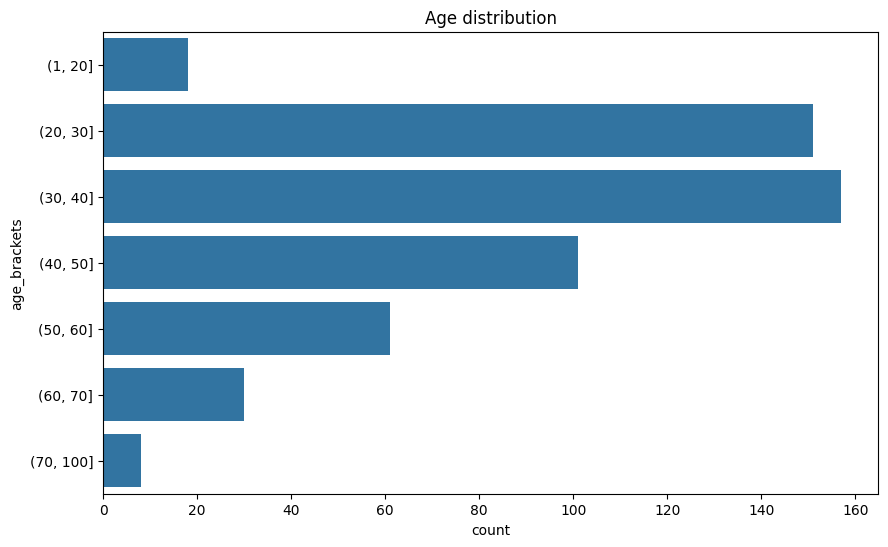

In [12]:
# Bar graph of the age distribution
# Create brackets for the age
age_brackets = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_brackets'] = pd.cut(data['age'], bins=[1, 20, 30, 40, 50, 60, 70, 100])
plt.figure(figsize=(10, 6))
sns.countplot(data['age_brackets'])
plt.title('Age distribution')
plt.show()

Most people are in the age group that normally use social media (both 20-30 and 30-40). 
The older age groups are less likely to use social media on an everyday basis (especially 60+).
That can explain the 14 people who don't use social media at all. 

### Social media

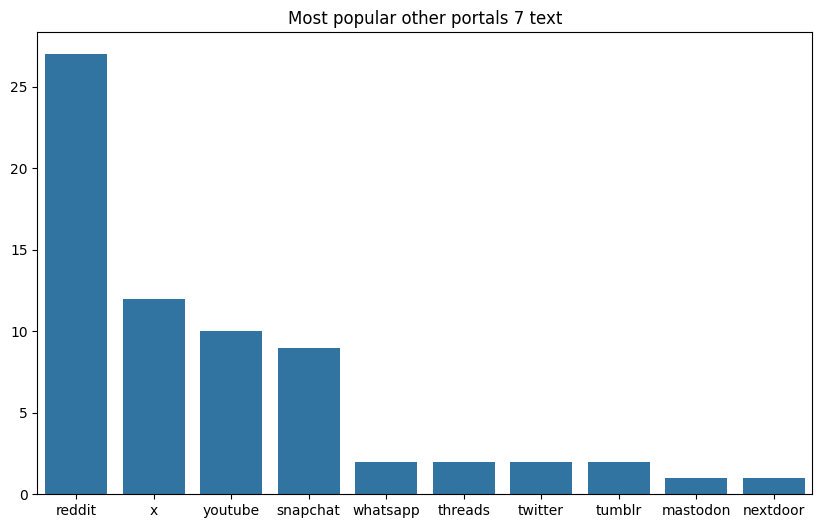

In [13]:
# plot of most popular other other_portals_7_text
# create a dictionary of row count in other_portals_7_text
other_portals_7_text = data['other_portals_7_text'].dropna()
# change the text to lowercase
other_portals_7_text = other_portals_7_text.str.lower()
# comma-separated text to list
other_portals_7_text = other_portals_7_text.str.split(',').explode()
# remove the punctuation ' and spaces
other_portals_7_text = other_portals_7_text.str.replace("'", "")
# remove the spaces
other_portals_7_text = other_portals_7_text.str.replace(" ", "")
dict_other_portals_7_text = Counter(other_portals_7_text)
# plot the most popular other portals 7 text and order them
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in dict_other_portals_7_text.most_common(10)],
            y=[x[1] for x in dict_other_portals_7_text.most_common(10)])
plt.title('Most popular other portals 7 text')
plt.show()


Some people marked X as just a new name for Twitter (and this was stated in the survey). Nextdoor is a social network for neighborhoods semi-popular in the US and UK.  Mastodon is a federated social network. But all of these are only checked once in the survey. So there are
not any other popular social media platforms that are not already included in the survey. Reddit is the most popular all topic online forum. Snapchat is a platform where people send photos to each other. Whatsapp is a communicator (like messenger). Threads is new meta alternative for twitter.

# Twitter post analysis

In [14]:
# Getting character lenght of the post_abortion and post_travel columns 
data['length_abor'] = data['post_abortion'].str.len()
data['length_trav'] = data['post_travel'].str.len()
data['length_ai'] = data['post_ai'].str.len()
data[['post_abortion','post_travel','post_ai','length_abor','length_trav','length_ai']].tail(5)

,post_abortion,post_travel,post_ai,length_abor,length_trav,length_ai
521,The importance of climate action cannot be emp...,I just had the most exquisite gastronomic expe...,AI is turning dreams into reality with innovat...,239,215,229.0
522,All these old white men trying to tell us wome...,"We went to ""this place"" over the weekend and t...",Look at these cool artworks made by AI in Nigh...,170,116,100.0
523,"Being a true ProLife supporter, I do not usual...",Had an amazing vacation. I consider myself ver...,AI is an amazing new tool but we have to have ...,278,276,237.0
524,I'm neutral on the abortion ban. I'm a Christi...,This year I traveled to Florida to soak up the...,A.I. is very intriguing. I hope to learn more ...,198,72,105.0
525,I'm deeply concerned about the complete ban on...,"Last summer, I explored the vibrant city of Ba...",AI is revolutionizing fields like healthcare a...,210,261,167.0


In [15]:
# Word count function
def word_count(text):
    if pd.isnull(text):
        return np.nan
    words = text.split()
    return len(words)

In [16]:
# Getting word count of the post_abortion and post_travel columns
data['word_count_abor'] = data['post_abortion'].apply(word_count)
data['word_count_trav'] = data['post_travel'].apply(word_count)
data['word_count_ai'] = data['post_ai'].apply(word_count)
data[['post_abortion','post_travel','post_ai','word_count_abor',
      'word_count_trav','word_count_ai']].tail(5)

,post_abortion,post_travel,post_ai,word_count_abor,word_count_trav,word_count_ai
521,The importance of climate action cannot be emp...,I just had the most exquisite gastronomic expe...,AI is turning dreams into reality with innovat...,36,32,34.0
522,All these old white men trying to tell us wome...,"We went to ""this place"" over the weekend and t...",Look at these cool artworks made by AI in Nigh...,33,24,19.0
523,"Being a true ProLife supporter, I do not usual...",Had an amazing vacation. I consider myself ver...,AI is an amazing new tool but we have to have ...,53,52,45.0
524,I'm neutral on the abortion ban. I'm a Christi...,This year I traveled to Florida to soak up the...,A.I. is very intriguing. I hope to learn more ...,36,16,24.0
525,I'm deeply concerned about the complete ban on...,"Last summer, I explored the vibrant city of Ba...",AI is revolutionizing fields like healthcare a...,28,39,23.0


In [17]:
# Plot two distributions with the legend
def visualize(col_ab, col_trav, col_ai, title):
    plt.subplot(1,2,2)
    sns.kdeplot(data[col_ab], label='abortion')
    sns.kdeplot(data[col_trav], label='travel')
    sns.kdeplot(data[col_ai], label='ai')
    legend = plt.legend()
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

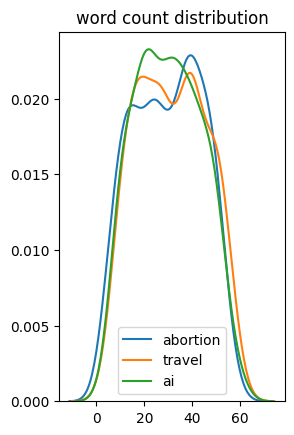

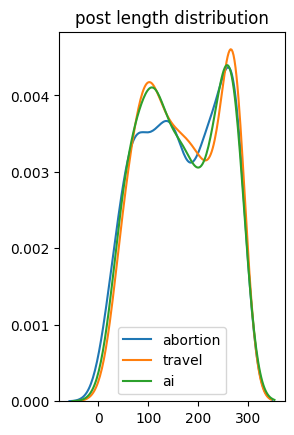

In [18]:
# visualize the distributions of the word count and the mean sentence length
visualize('word_count_abor', 'word_count_trav', 'word_count_ai', 'word count distribution')
visualize('length_abor', 'length_trav', 'length_ai', 'post length distribution')


In [19]:
print(f'Mean word count of the Abortion post: {data["word_count_abor"].mean() : .2f}')
print(f'Mean word count of the Travel Post: {data["word_count_trav"].mean() : .2f}')
print(f'Mean word count of the AI Post: {data["word_count_ai"].mean() : .2f}')
print('')
print(f'Mean character length of the Abortion post: {data["length_abor"].mean() : .2f}')
print(f'Mean character length of the Travel Post: {data["length_trav"].mean() : .2f}')
print(f'Mean character length of the AI Post: {data["length_ai"].mean() : .2f}')
print('')
print(f'Mean character length of the Abortion post: {data["length_abor"].max() : .2f}')
print(f'Mean character length of the Travel Post: {data["length_trav"].max() : .2f}')
print(f'Mean character length of the AI Post: {data["length_ai"].max() : .2f}')

Mean word count of the Abortion post:  29.56
Mean word count of the Travel Post:  31.24
Mean word count of the AI Post:  30.00

Mean character length of the Abortion post:  166.23
Mean character length of the Travel Post:  169.56
Mean character length of the AI Post:  166.54

Mean character length of the Abortion post:  280.00
Mean character length of the Travel Post:  280.00
Mean character length of the AI Post:  280.00


The mean word count and mean character length are similar, also the extremes of the plots are very similar. The travel post is on average the longest. The maximum length is 280 which is the current limit (was 140 characters before November 2017).

New connected data has on average twice as long posts than the previous data.

## Term Frequency Analysis

In [20]:
# Clean the text
def clean(review):
    if pd.isnull(review):
        return np.nan
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() 
                       if word not in stopwords.words('english')])
    return review

In [21]:
data['post_abortion'] = data['post_abortion'].apply(clean)
data['post_travel'] = data['post_travel'].apply(clean)
data['post_ai'] = data['post_ai'].apply(clean)
data.tail(2)

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,other,other_portals_7_text,post_ai,age_brackets,length_abor,length_trav,length_ai,word_count_abor,word_count_trav,word_count_ai
524,year traveled florida soak sun enjoy time,im neutral abortion ban im christian believe g...,2.889,2.778,2.0,NaN,60,5.0,NaN,4.0,...,NaN,NaN,ai intriguing hope learn also hope able use fu...,"(50, 60]",198,72,105.0,36,16,24.0
525,last summer explored vibrant city barcelona hi...,im deeply concerned complete ban abortion deci...,2.778,1.000,2.0,NaN,45,5.0,NaN,4.0,...,NaN,NaN,ai revolutionizing fields like healthcare tran...,"(40, 50]",210,261,167.0,28,39,23.0


In [22]:
# Create a corpus
def corpus(text):
    if pd.isnull(text):
        return np.nan
    text_list = text.split()
    return text_list

In [23]:
data['post_abortion_lists'] = data['post_abortion'].apply(corpus)
data['post_travel_lists'] = data['post_travel'].apply(corpus)
data['post_ai_lists'] = data['post_ai'].apply(corpus)
data.tail(2)

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,age_brackets,length_abor,length_trav,length_ai,word_count_abor,word_count_trav,word_count_ai,post_abortion_lists,post_travel_lists,post_ai_lists
524,year traveled florida soak sun enjoy time,im neutral abortion ban im christian believe g...,2.889,2.778,2.0,NaN,60,5.0,NaN,4.0,...,"(50, 60]",198,72,105.0,36,16,24.0,"[im, neutral, abortion, ban, im, christian, be...","[year, traveled, florida, soak, sun, enjoy, time]","[ai, intriguing, hope, learn, also, hope, able..."
525,last summer explored vibrant city barcelona hi...,im deeply concerned complete ban abortion deci...,2.778,1.000,2.0,NaN,45,5.0,NaN,4.0,...,"(40, 50]",210,261,167.0,28,39,23.0,"[im, deeply, concerned, complete, ban, abortio...","[last, summer, explored, vibrant, city, barcel...","[ai, revolutionizing, fields, like, healthcare..."


In [24]:
# Count the number of words in the corpus
corpus_ab = []
corpus_tr = []
corpus_ai = []
for text in data['post_abortion_lists']:
    corpus_ab += text
for text in data['post_travel_lists']:
    corpus_tr += text
for text in data['post_ai_lists']:
    if text is not np.nan:
        corpus_ai += text
print(f"Abortion total words:\t{len(corpus_ab)} \nTravel total words:\t{len(corpus_tr)} \nAI total words:\t{len(corpus_ai)}")

Abortion total words:	7659 
Travel total words:	8522 
AI total words:	5364


### Most common words

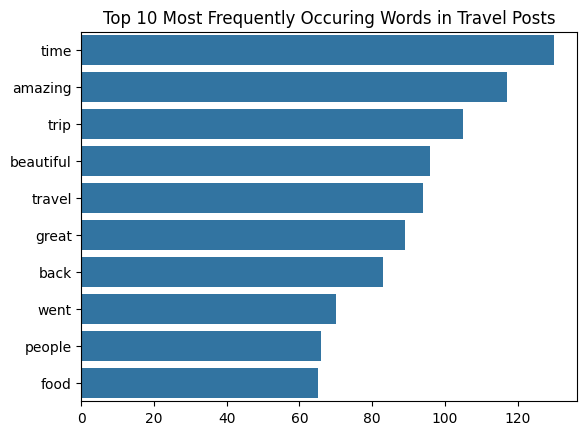

In [25]:
# Most common words
mostCommon_ab = Counter(corpus_ab).most_common(10)
mostCommon_tr = Counter(corpus_tr).most_common(10)
mostCommon_ai = Counter(corpus_ai).most_common(10)

words = []
freq = []
for word, count in mostCommon_tr:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Travel Posts')
plt.show()


In the top 10 most common words in Travel post, we have some travel related words (travel, place, trip) and some positively emotional words (amazing, beautiful, 
great). Those words are consistent with the previous data.

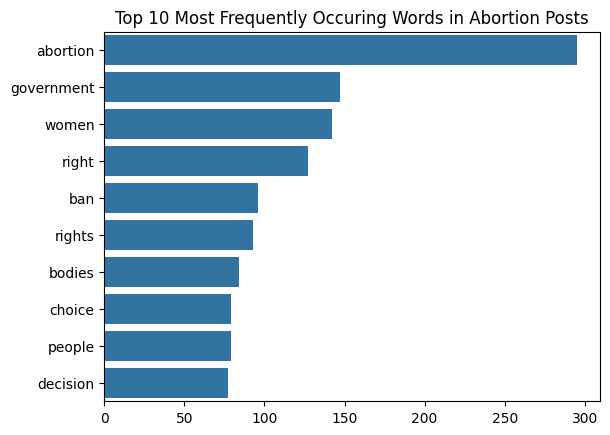

In [26]:
words = []
freq = []
for word, count in mostCommon_ab:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Abortion Posts')
plt.show()

In the abortion post the keyword is much more present (abortion - over 90 hits). This (with the other 5 top words) shows that in these emotional topics the vocabulary 
is limited. These words are also consistent with the previous data.

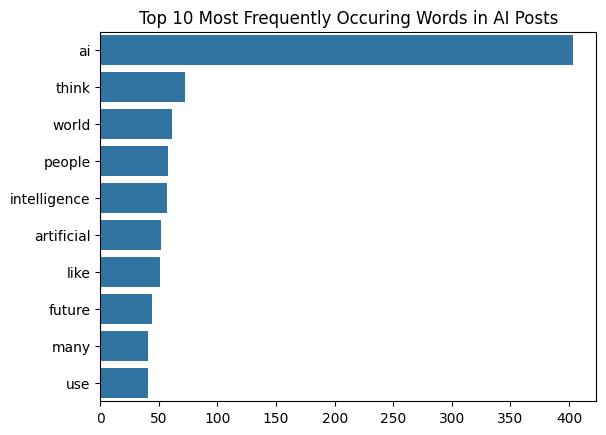

In [27]:
words = []
freq = []
for word, count in mostCommon_ai:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in AI Posts')
plt.show()
    

There is even bigger frequency difference here then in the abortion posts. The wording then is rather more general.

In [28]:
def bigram_freq(column):
    column = column.dropna()
    cv = CountVectorizer(ngram_range=(2,2))
    bigrams = cv.fit_transform(column)
    count_values = bigrams.toarray().sum(axis=0)
    bigram_freq = pd.DataFrame(
        sorted([(count_values[i], k) 
                for k, i in cv.vocabulary_.items()], reverse = True))
    bigram_freq.columns = ["frequency", "bigram"]
    return bigram_freq


### Most common bigrams

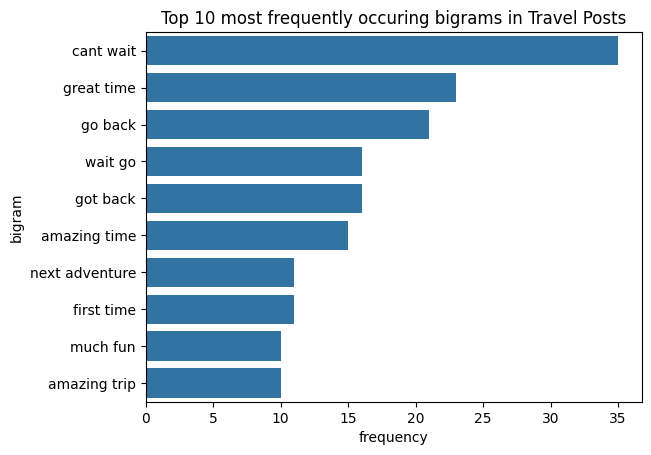

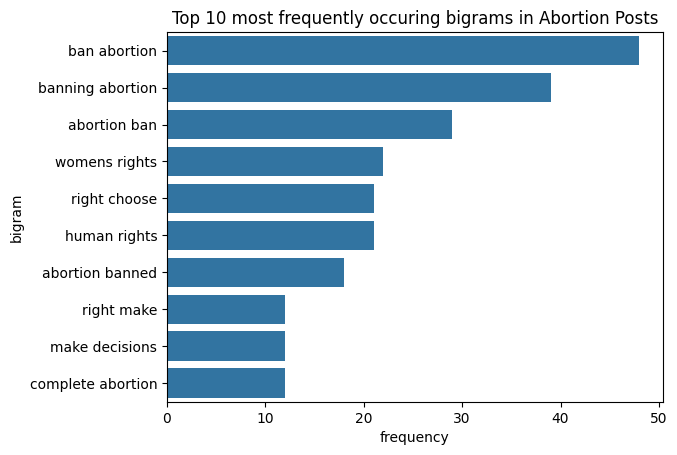

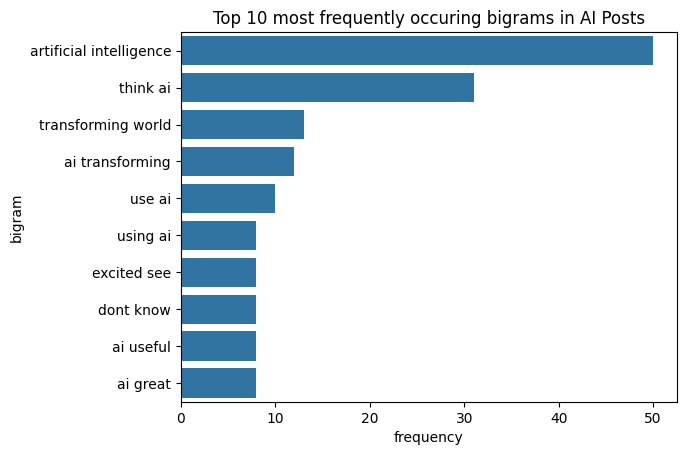

In [29]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams_ab_freq = bigram_freq(data['post_abortion'])
bigrams_tr_freq = bigram_freq(data['post_travel'])
bigrams_ai_freq = bigram_freq(data['post_ai'])

sns.barplot(x=bigrams_tr_freq['frequency'][:10], 
            y=bigrams_tr_freq['bigram'][:10])
plt.title('Top 10 most frequently occuring bigrams in Travel Posts')
plt.show()

sns.barplot(x=bigrams_ab_freq['frequency'][:10], 
            y=bigrams_ab_freq['bigram'][:10])
plt.title('Top 10 most frequently occuring bigrams in Abortion Posts')
plt.show()

sns.barplot(x=bigrams_ai_freq['frequency'][:10],
            y=bigrams_ai_freq['bigram'][:10])
plt.title('Top 10 most frequently occuring bigrams in AI Posts')
plt.show()


In bigrams it is clearly seen that bigram of abortion and banning (ban abortion, banning abortion, banned abortion, abortion banned) is the most popular giving in total 43 occurrences. Also top 10 Abortion biagrams are on average more popular. In travel posts there is a focus connected to a good time spent (amazing time, great time, best time and also next year and can't wait). In ai posts almost all bigrams are having ai in them. 

## Correlation Matrix

In [30]:
columns_for_corr_1 = ['adm', 'riv', 'length_abor', 'length_trav', 'word_count_abor', 'word_count_trav']
columns_for_corr_2 = ['adm', 'riv','gender','age', 'education', 'marital_status','employment','ethnic_background']

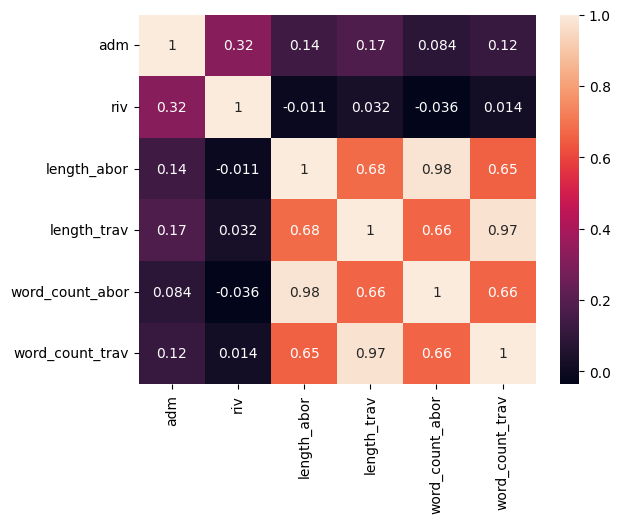

In [31]:
sns.heatmap(data[columns_for_corr_1].corr(), annot=True)
plt.show()

There is a standard correlation between word count and the length of a post. There is also a strong correlation between the length of one post with the length of the second post. The Narcissistic Admiration and Narcissistic Rivalry traits are also correlated. In the terms of length of a post and the Narcissistic traits there isn't any strong correlation. The interesting thing however is that ADM is weakly positively correlating and the RIV is rather very weakly negatively correlating.

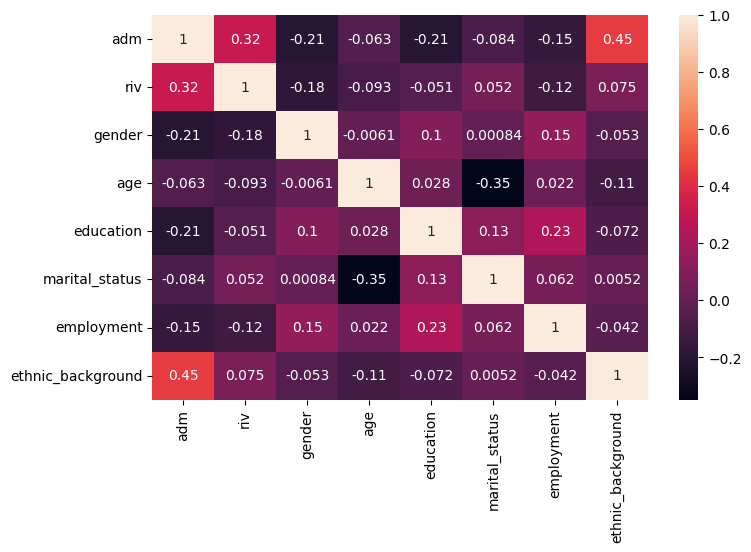

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[columns_for_corr_2].corr(), annot=True)
plt.show()

In this correlation matrix, we mostly don't see any correlation between narcism and other labels - which can be a good sight that means that our data is rather general. 
The weird thing is a correlation between ethnic background and ADM. It may come from small samples in some ethnic groups. The correlations between employment and education or marital status and age are common signs. There is also a small negative correlation between gender and narcissism (in this data men have higher scores of both ADM and RIV). Also, there is a correlation between younger people and ADM narcissism. Adding new data made correlations slightly weaker.

## Summary

The data (total 526 observations) represents a good range of Narcissistic Admiration. The Narcissistic Rivalry scores are a little lower, but still most observations are between 1 and 4 (on a scale of 1 to 6). The data is exactly divided by gender and most participants are between 20 and 50 years old - which is our target group of people using X (former Twitter). The post length is a plausible in case of Twitter with mean length of 167 characters (30 words) for all types of posts.


The emotional (abortion) post has a more topic-focused vocabulary and a less diverse vocabulary than the normal (travel) post. Additional topic (ai) has very divergent vocabulary. This could generate some problems when making model more general. 

In data there isn't a strong correlation between posts length and Narcissistic traits. That is also the case for Narcissism and demographics.

New data changed the mean length of a post to longer, gave a new topic and lowered almost all correlations. Apart from that results didn't show any differences.


After looking into AI generated posts (ultimately 16 was found) - based on two criteria. 1. Post starts with something like "just finished" or "just returned". 2. There are recurring tags written in camel case (#TravelDiaries, #FutureTech). That leaves final number of observations at 510. It is interesting that those posts were only found in the new data, so either the models weren't used previously (there was also no AI topic then) or they got more predictable in generating Twitter posts.